# FordGo Bike Data Exploration
## by Syed M Kamran

## Preliminary Wrangling

> The dataset I've chosen for analyses is FordGO Bike sharing data. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. For the purpose of this project, I will be analyzing and visualizing FordGo Bike data for the years 2017 and 2018.

In [142]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

## Gathering

I have manually downloaded the required (following) files from the given link and saved them on my PC. Now I will load them into the pandas dataframe.

- 2017-fordgobike-tripdata.csv.zip
- 2018 (All months from 01 to 12)

In [143]:
path = r'C:\Users\Kami\Downloads\UDACITY\Data Analyst NanoDegree\Project 5 Data Visualization\**'
path_lists = glob.glob(path + '/*.csv')
df = pd.DataFrame() #empty dataframe
for i in path_lists:
    df = df.append(pd.read_csv(i))


## Assessing

In [144]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2383421 entries, 0 to 131362
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 272.8+ MB


In [146]:
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip    519700
dtype: int64

In [147]:
num_rows, num_cols = df.shape
print('No of rows = {}, No of Cols = {}'.format(num_rows,num_cols))

No of rows = 2383421, No of Cols = 14


In [148]:
print("Rows with missing data = {}".format(df[df.isnull().any(axis=1)].shape[0]))

Rows with missing data = 531471


<i>Issue No 1: Change datatype of columns (start_time, end_time) from strings to datetime.</i><br/>
<i>Issue No 2: Handle missing values for columns (start_station_id, start_station_name, end_station_id, end_station_name,bike_share_for_all_trip). </i> <br/>
<i> Issue No 3: 1051171 rows with missing data </i>

## Cleaning

In [149]:
df_clean = df.copy()

<b> Solving Issue No 1: Change datatype of columns (start_time, end_time) from strings to datetime. <b/>

In [150]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

<b> Testing Issue No 1: Change datatype of columns (start_time, end_time) from strings to datetime.</b>

In [151]:
df_clean.dtypes #AS we can see, datatype of columns start_time and end_time has been updated.

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
bike_share_for_all_trip            object
dtype: object

In [152]:
print (df_clean['start_time'].dt.month.unique())
print (df_clean['start_time'].dt.year.unique()) #Moreover, There are two unique years and 12 unique months that means, we have 
#gathered our data succesfully.

[12 11 10  9  8  7  6  1  2  3  4  5]
[2017 2018]


<b> Solving Issue No 2: Handle missing values for columns (start_station_id, start_station_name, end_station_id, end_station_name,bike_share_for_all_trip).<b/>

In [153]:
df_clean.isnull().sum() [df_clean.isnull().sum() > 0].sort_values(ascending=False)

bike_share_for_all_trip    519700
end_station_name            11771
end_station_id              11771
start_station_name          11771
start_station_id            11771
dtype: int64

It looks like column "bike_share_for_all_trip" has a lot of missing values. It will be a good idea to drop this column.

In [154]:
df_clean.drop(['bike_share_for_all_trip'],axis=1,inplace=True)

Now for remaining missing values, I will just drop the rows having missing values.

In [155]:
df_clean.dropna(axis=0,inplace=True)

<b> Testing Issue No 2: Handle missing values for columns (start_station_id, start_station_name, end_station_id, end_station_name,bike_share_for_all_trip).</b>

In [156]:
df_clean.shape 

(2371650, 13)

In [157]:
df_clean.isnull().sum() #Now we don't have anymore missing values.

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

<b> Solving Issue No 3: 1051171 rows with missing data.<b/>

Since we have dropped missing values now we should have 0 rows with missing data. Let's verify it.

<b> Testing Issue No 3: 1051171 rows with missing data.</b>

In [158]:
df_clean[df_clean.isnull().any(axis=1)].shape[0]

0

So it is clear, Now we don't have any rows with missing value.

##### Let's save cleaned dataset.

In [159]:
path = r'C:\Users\Kami\Downloads\UDACITY\Data Analyst NanoDegree\Project 5 Data Visualization'
df_clean.to_csv(path + '\cleaned-fordgobike.csv',index=False)

### What is the structure of your dataset?

After Cleaning the dataset, we now have 2371650 bike trips and 13 features. The dataset contains information about the following:

- Start Time, End Time, and Total Duration of the trip.<br/>
- Start and end stations information like id,name, map coordinates.<br/>
- Id of the bike that is rented.<br/>
- Type of user. (“Subscriber” = Member or “Customer” = Casual).<br/>

### What is/are the main feature(s) of interest in your dataset?
We can get number of different information from this dataset. But, I'll be investigating this dataset for following:

- Predict the demand for bikes at different times of the day for different locations.
- How long does the average trip take? 
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- Whether the most of users are subscriber (Member) or Customer (Causal User) or Whether the demand for bikes influences by the  type of customer?



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features like: Start Time, End Time, Start Station , End Station and user_type will be used mostly to provide the answer of the above questions.

## Univariate Exploration


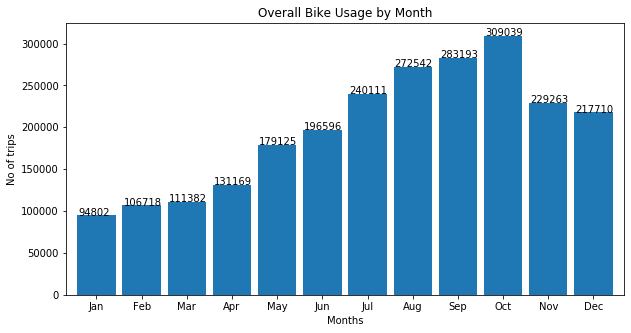

In [160]:
#Let's start exploring demands for bikes in different months.

months = df_clean.start_time.dt.month.value_counts().sort_index()
months.plot(kind='bar',figsize=(10,5),width=0.85)
plt.xticks(np.arange(0,12,1),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation = 0);
x=0
for month in months:
    plt.text(x-0.4,month,month)
    x += 1
plt.xlabel('Months')    
plt.ylabel('No of trips') 
plt.title('Overall Bike Usage by Month');

<b>Insight No 1:</b> Overall, Demand for Ford Go Bike is very high in October, followed by September then August. We can also see increase in trend starting from January, going all the way to the October, then there is a decrease in demands for bikes in November and December.


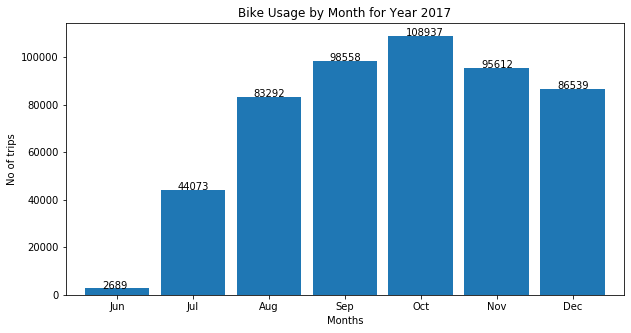

In [161]:
#Above Insight was based on the over popular starting months. Now, Let's analyze months by year.


#For year 2017
months_2017 = df_clean [df_clean.start_time.dt.year == 2017].start_time.dt.month.value_counts().sort_index()
months_2017.plot(kind='bar',figsize=(10,5),width=0.85);
plt.xticks(np.arange(0,7,1),['Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation = 0);
x=0
for months_2017 in months_2017:
    plt.text(x-0.2,months_2017,months_2017)
    x += 1
plt.xlabel('Months')    
plt.ylabel('No of trips') 
plt.title('Bike Usage by Month for Year 2017');    

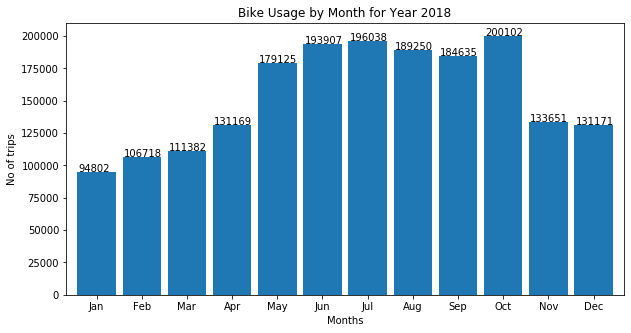

In [162]:
#For year 2018

months_2018 = df_clean [df_clean.start_time.dt.year == 2018].start_time.dt.month.value_counts().sort_index()
months_2018.plot(kind='bar',figsize=(10,5),width=0.85);
plt.xticks(np.arange(0,12,1),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation = 0);
x=0
for months_2018 in months_2018:
    plt.text(x-0.4,months_2018,months_2018)
    x += 1
plt.xlabel('Months')    
plt.ylabel('No of trips') 
plt.title('Bike Usage by Month for Year 2018');     

<b>Insight No 2:</b> So we can see, Even after breaking the data month wise, October is still leading in both years.<br/>

For the year 2017: There is not much difference in trips taken in the months September, October and November However, we can see that, there are missing months from January to May or may be June also because, in June, there is much lower trips than other months. So might have missing data from June also.

For the year 2018: Months June, July and October are very close followed by August and September.<br/> 
Increase in demand can be observed from January till October.



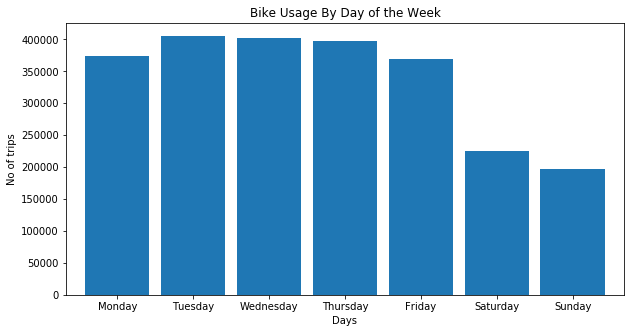

In [163]:
#Exploring demands for bikes for different days of the week.

days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_clean.start_time.dt.day_name().value_counts().sort_index().reindex(days).plot(kind='bar',figsize=(10,5),width=0.85);
plt.xticks(rotation = 0);
plt.xlabel('Days')
plt.ylabel('No of trips')
plt.title('Bike Usage By Day of the Week');

<b>Insight No 3:</b> It seems like most of the people use Bikes on weekdays than on weekends. This may suggests, most of the people use Ford Go Bikes for commuting to their offices or workplace.

In [164]:
#Let's get percentages of people using bikes on weekdays vs people using bikes on weekends.

weekday_count = df_clean.start_time.dt.day_name().value_counts().sort_index().reindex(days).iloc[0:5].sum()
weekend_count = df_clean.start_time.dt.day_name().value_counts().sort_index().reindex(days).iloc[-2:].sum()
total_count = df_clean.start_time.dt.day_name().value_counts().sort_index().reindex(days).sum()

weekday_percent = ((weekday_count/total_count) * 100) 
weekend_percent = ((weekend_count/total_count) * 100) 

print('Percentage of people using bikes on weekdays = {:.2f}%'.format(weekday_percent))
print('Percentage of people using bikes on weekends = {:.2f}%'.format(weekend_percent))

Percentage of people using bikes on weekdays = 82.19%
Percentage of people using bikes on weekends = 17.81%


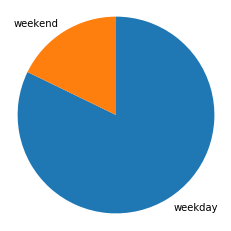

In [165]:
plt.pie([weekday_percent,weekend_percent],labels=['weekday','weekend'],startangle=90,counterclock = False)
plt.axis('square');

<b>Insight No 4:</b> So we can visualize clearly, 82.19% people use bikes on weekdays while only 17.81% people use bikes on weekends. So we can say there is a much greater demand for bikes on weekdays rather than on weekends.

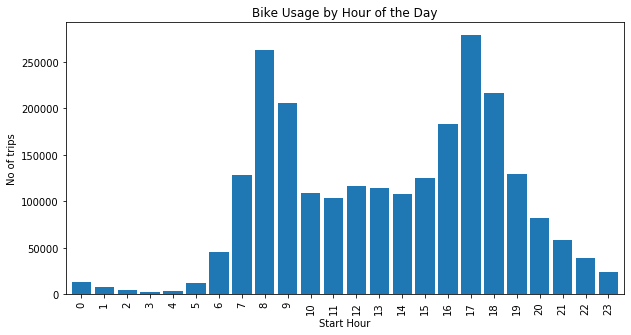

In [166]:
#Exploring demands for bikes for different hours of the day.

df_clean.start_time.dt.hour.value_counts().sort_index().plot(kind='bar',figsize=(10,5),width=0.85);
plt.ylabel('No of trips')
plt.xlabel('Start Hour')
plt.title('Bike Usage by Hour of the Day');

<b>Insight No 5:</b> Interesting..! We can clearly see two peaks, one at around 8-9 AM and second at around 5-6 PM. Since these can be the timings of any workplace/office, so plotting this graphs makes our previous analyses that was "regarding more people using bikes for commuting to office", more stronger.

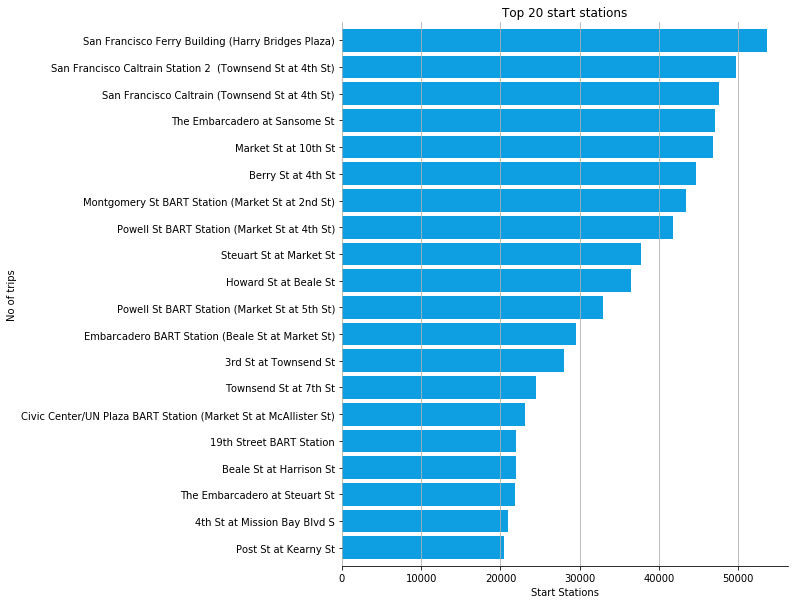

In [167]:
#Let's investigate most popular (top 20) start stations.

popular_start_stations = df_clean.start_station_name.value_counts().iloc[:20].sort_values()
#print(popular_start_stations)
plot = popular_start_stations.plot(kind='barh',figsize=(8, 10), color='#0E9FE3', width=0.85)
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.spines['left'].set_visible(False)
plt.ylabel('No of trips')
plt.xlabel('Start Stations')
plt.title('Top 20 start stations')
plot.grid(axis='x')

<b>Insight No 6:</b> As it is evident from the graph, <i>"San Francisco Ferry Building (Harry Bridges Plaza)</i> is the most used start station followed by <i>"San Francisco Caltrain Station 2  (Townsend St at 4th St)"</i>. Stations <i>"Market St at 10th St, The Embarcadero at Sansome St, and San Francisco Caltrain (Townsend St at 4th St)" </i>
share almost same count. So, we can say, demands of bike are high at these stations.<br/>

On the other hand, <i>"Post St at Kearny St, 4th St at Mission Bay Blvd S, The Embarcadero at Steuart St ,Beale St at Harrison St, and 19th Street BART Station"</i> are accounted for lowest demands in top 20 stations.

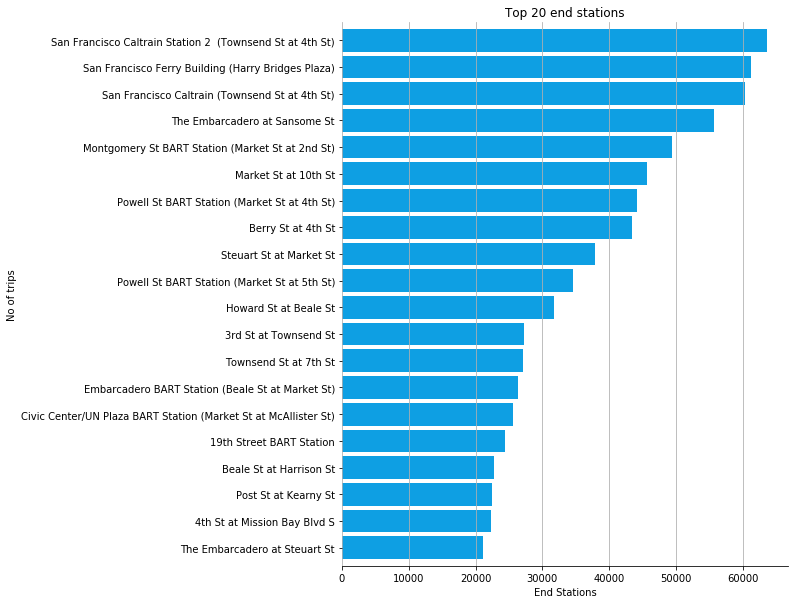

In [168]:
#Let's investigate most popular (top 20) end stations.
popular_end_stations = df_clean.end_station_name.value_counts().iloc[:20].sort_values()
#print(popular_end_stations)
plot = popular_end_stations.plot(kind='barh',figsize=(8, 10), color='#0E9FE3', width=0.85)
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.spines['left'].set_visible(False)
plt.ylabel('No of trips')
plt.xlabel('End Stations')
plt.title('Top 20 end stations')
plot.grid(axis='x')

<b>Insight No 7:</b> <i>"San Francisco Caltrain Station 2  (Townsend St at 4th St)"</i> is the most popular end station followed by <i>"San Francisco Caltrain (Townsend St at 4th St), San Francisco Ferry Building (Harry Bridges Plaza)"</i> <br/>
Having these three as most popular start and end stations certainly means there is high demands in bikes at these stations.

In [169]:
#Let's investigate trip durations.
df_clean.insert(1,'duration_min',df_clean.duration_sec/60) #Converting durations from seconds to minutes.

In [170]:
df_clean.duration_min.describe().apply(lambda x: format(x, 'f'))

count    2371650.000000
mean          15.115127
std           43.727146
min            1.016667
25%            5.950000
50%            9.400000
75%           14.733333
max         1439.483333
Name: duration_min, dtype: object

75th percentile is around 15 minutes but the max value is 1440 minutes that makes total trip duration of 24 hours which is quite strange.

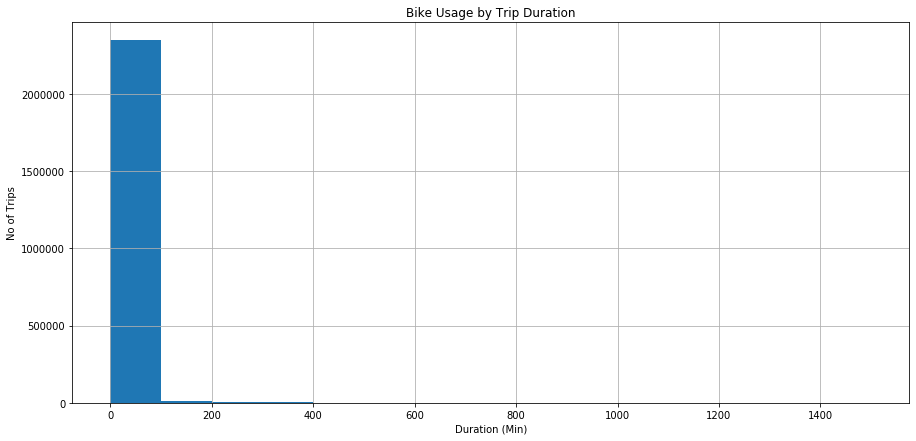

In [171]:
#Let's plot the disribution of minutes.
bins = np.arange(0, df_clean.duration_min.max() + 100, 100)
df_clean.duration_min.hist(bins=bins,figsize=(15,7));
plt.xlabel('Duration (Min)')
plt.ylabel('No of Trips')
plt.title('Bike Usage by Trip Duration');

It looks like, Most of the values are between 0 to 100 mins but with this graph, we cannot tell for sure. Moreover, only few trips are greater than 100 minutes making whole distribution right skewed. It will be easier to get the better idea of distribution by taking log10 transform.

In [172]:
np.log10(df_clean.duration_min.describe())

count    6.375051
mean     1.179412
std      1.640751
min      0.007179
25%      0.774517
50%      0.973128
75%      1.168301
max      3.158207
Name: duration_min, dtype: float64

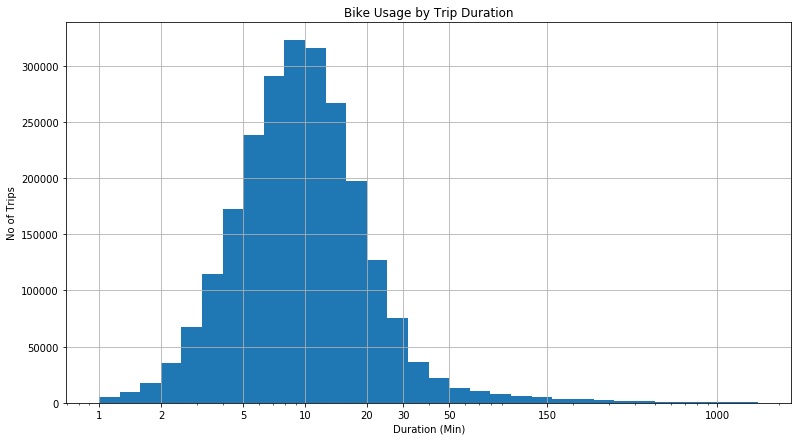

In [173]:
#plotting log10 transformation of duration_min

bins = 10 ** np.arange(0, np.log10(df_clean.duration_min.describe())['max'] + 0.1 , 0.1)
ticks = [1,2,5,10,20,30,50,150,1000]
df_clean.duration_min.hist(bins=bins,figsize=(13,7));
plt.xscale('log')
plt.xticks(ticks,ticks);
plt.xlabel('Duration (Min)')
plt.ylabel('No of Trips')
plt.title('Bike Usage by Trip Duration');

Now It is much clear distribution and better to analyze. We can see clearly, most of the trips durations are between 2 to 50 minutes having peak at around 10. We can consider durations greater than 50 minutes as outliers.

In [174]:
num_rows_20_50 = df_clean[(df_clean.duration_min >= 2) & (df_clean.duration_min <= 50)].shape[0]
print ("Number of trips having duration between 2 to 50 minutes (both inclusive) = {}".format(num_rows_20_50))

Number of trips having duration between 2 to 50 minutes (both inclusive) = 2281338


In [175]:
num_rows_gt_50 = df_clean[(df_clean.duration_min < 2) | (df_clean.duration_min >50)].shape[0]
print ("Number of trips having duration less than 2 or greater than 50 minutes = {}".format(num_rows_gt_50))

Number of trips having duration less than 2 or greater than 50 minutes = 90312


In [176]:
total_rows = df_clean.shape[0]
print("Total Number of rows = ",total_rows)

Total Number of rows =  2371650


In [177]:
print ("Percentage of trips having duration between 2 to 50 minutes (both inclusive) = {:.2f}%".format((num_rows_20_50/ total_rows) * 100))

Percentage of trips having duration between 2 to 50 minutes (both inclusive) = 96.19%


So, Now it is very much clear that we have more than 96% of trips having duration between 2 to 50 minutes (both inclusive) That means there are only around 4% of the rows with duration less than 2 or greater than 50 minutes. So I think it will be better to avoid these rows/trips while making conclusion regarding the duration of the trips.

In [178]:
df_clean[(df_clean.duration_min >= 2) & (df_clean.duration_min <= 50)].duration_min.describe().apply(lambda x: format(x, 'f'))

count    2281338.000000
mean          11.272548
std            7.518811
min            2.000000
25%            6.000000
50%            9.316667
75%           14.283333
max           50.000000
Name: duration_min, dtype: object

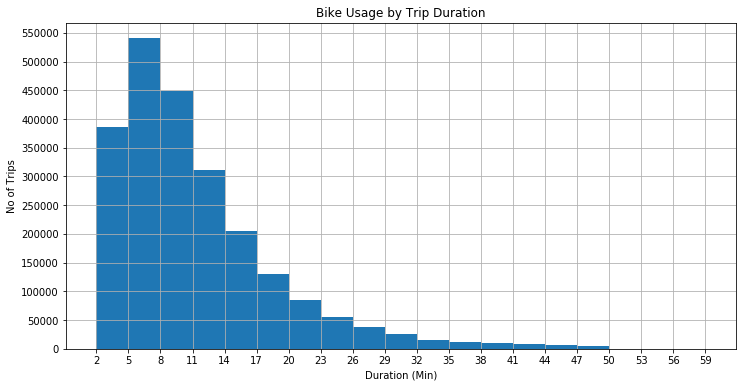

In [179]:
#plt.subplots()
bins = np.arange(2,60,3)
#print(bins)
yticks = np.arange(0,600000,50000)
df_clean[(df_clean.duration_min >= 2) & (df_clean.duration_min <= 50)].duration_min.plot(kind='hist',bins=bins,grid=True,figsize =(12,6))
plt.xticks(bins);
plt.yticks(yticks)
plt.xlabel('Duration (Min)')
plt.ylabel('No of Trips')
plt.title('Bike Usage by Trip Duration');

<b>Insight No 8:</b> By looking at the above graph we can say people use bikes for short trips because most of the trips duration are under 17 minutes while average trip duration is around 11 minutes.

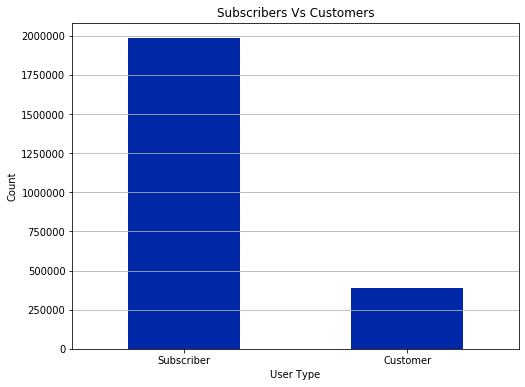

In [180]:
#Analyzing UserTypes.

df_clean.user_type.value_counts().plot(kind='bar',figsize=(8,6),color='#0027A8')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Subscribers Vs Customers');

<b>Insight No 9:</b> Most of the users are subscriber (Member) almost 20 lacs. Customers (Causal) are around 4 lacs.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>While analyzing the Month-wise demand for FordGo Bikes, We have seen that we don't have data for the months of January to May for year 2017. So comparing data/demand on the basis of overall plot will not be a good idea as missing months of year 2017 have values equal to that of year 2018, So technically, we are only observing data of these months from year 2018 in combined plot as well.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>While investigating trip durations, I have converted durations from seconds to minutes so that they will become easier for analysis. Moreover, I have also plotted distribution on log10 scale in order to get the better idea or estimate of the shape.

## Bivariate Exploration


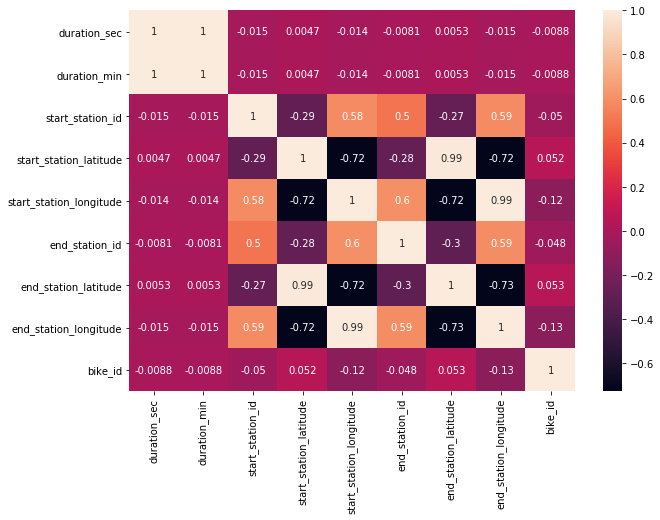

In [181]:
#Checking for correlation among variables.
plt.subplots(figsize=(10,7))
sb.heatmap(df_clean.corr(),annot=True);

Heatmap doesn't show any interesting correlation other than the obvious ones.

In [182]:
#Bike Usage by Day of the week for different user type.
df_clean['day_name'] = df_clean.start_time.dt.day_name()

In [183]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_clean['day_name'] = pd.Categorical(df_clean['day_name'],days,ordered=True)

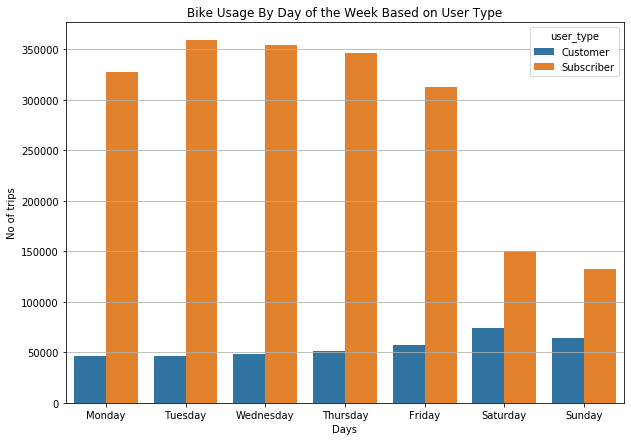

In [184]:
plt.subplots(figsize=(10,7))
sb.countplot(data=df_clean, x='day_name',hue='user_type');
plt.xticks(rotation = 0);
plt.xlabel('Days')
plt.ylabel('No of trips')
plt.title('Bike Usage By Day of the Week Based on User Type');
plt.grid(axis='y')

<b>Insight No 10:</b> Subscribers tend to use more bikes than customers on every day of the week. On weekends, there is a significant drop in the volume of subscibers but slight increase in the volume of customers.

In [185]:
#Bike Usage by Hour for different user type.
df_clean['start_hour'] = df_clean.start_time.dt.hour

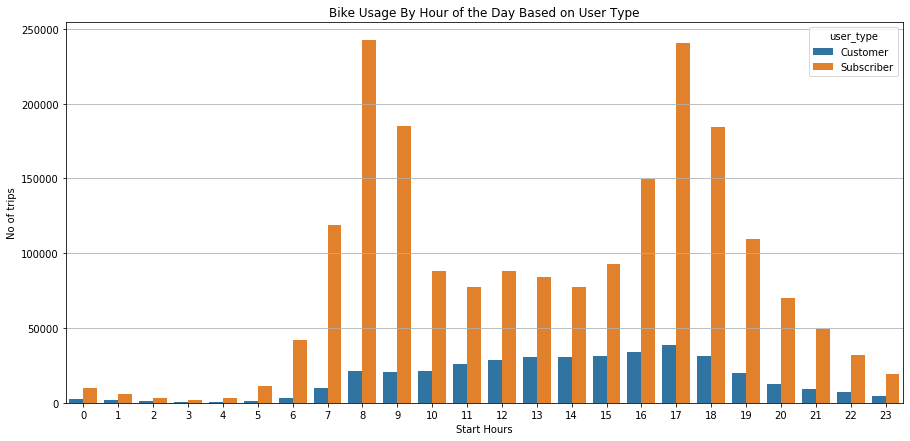

In [186]:
plt.subplots(figsize=(15,7))
sb.countplot(data=df_clean, x='start_hour',hue='user_type');
plt.xticks(rotation = 0);
plt.xlabel('Start Hours')
plt.ylabel('No of trips')
plt.title('Bike Usage By Hour of the Day Based on User Type');
plt.grid(axis='y')

<b>Insight No 11:</b> We can clearly see two peaks, one at around 8 AM and second at around 5 PM, Both of these belong to the subscribers group. This means, Subsribers tend to use more bikes for commuting to office. On the other hand, Customers usage is more in the afternoon from 12 PM till the evening 6 PM and there is not much difference in the usage during these hours.

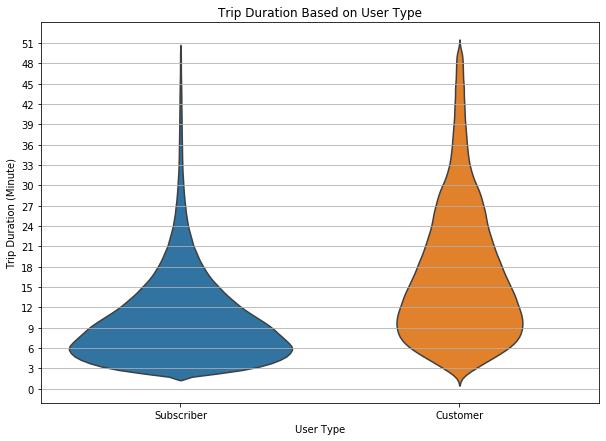

In [187]:
#Trip durations for different user type.
plt.subplots(figsize=(10,7))
sb.violinplot(data=df_clean[(df_clean.duration_min >= 2) & (df_clean.duration_min <= 50)], x='user_type',y='duration_min',inner=None);
plt.yticks(np.arange(0,52,3));
plt.xlabel('User Type');
plt.ylabel('Trip Duration (Minute)');
plt.title('Trip Duration Based on User Type');
plt.grid(axis='y')

<b>Insight No 12:</b> Most of the subscribers tend to ride bikes for shorter duration around 6 to 12 minutes While there is a much greater variations in rides of customer. We can also see, For longer trip durations (above 30 minutes), Customers ride more than the subscribers.

In [188]:
#Popular Start Stations (top 20) based on user type.
popular_start_stations = df_clean.start_station_name.value_counts().iloc[:20].sort_values().index
#print(popular_start_stations)
subset_df = df_clean[df_clean.start_station_name.isin(popular_start_stations)]

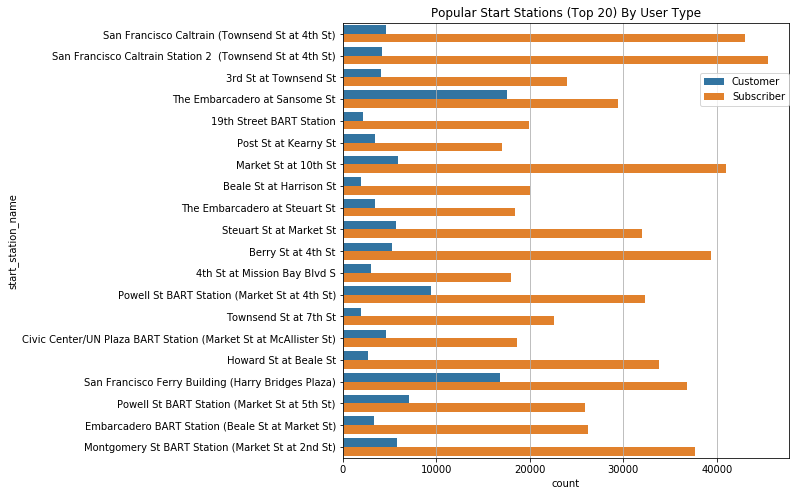

In [189]:
plt.subplots(figsize=(8,8))
sb.countplot(data=subset_df, y='start_station_name',hue='user_type');
plt.legend(loc=(0.8,0.81));
plt.grid(axis='x')
plt.title('Popular Start Stations (Top 20) By User Type');

<b>Insight No 13:</b> Overall, We can see all most popular (top 20) start stations serve more subscribers rather than customers. On the other hand, Start stations <i>"The Embarcadero at Sansome St" and "San Francisco Ferry Building (Harry Bridges Plaza)" </i> serve comparatively more customers than other start stations.

In [190]:
#Popular End Stations (top 20) based on user type.
popular_end_stations = df_clean.end_station_name.value_counts().iloc[:20].sort_values().index
#print(popular_end_stations)
subset_df = df_clean[df_clean.end_station_name.isin(popular_end_stations)]

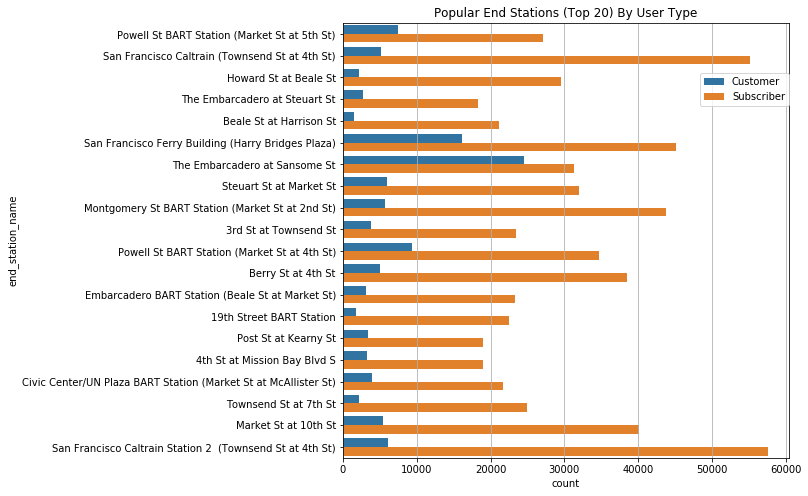

In [191]:
plt.subplots(figsize=(8,8))
sb.countplot(data=subset_df, y='end_station_name',hue='user_type');
plt.legend(loc=(0.8,0.81));
plt.grid(axis='x')
plt.title('Popular End Stations (Top 20) By User Type');

<b>Insight No 14:</b> Again, We can see all most popular (top 20) end stations serve more subscribers rather than customers. On the other hand, End stations <i>"The Embarcadero at Sansome St" and "San Francisco Ferry Building (Harry Bridges Plaza)" </i> serve comparatively more customers than other end stations.

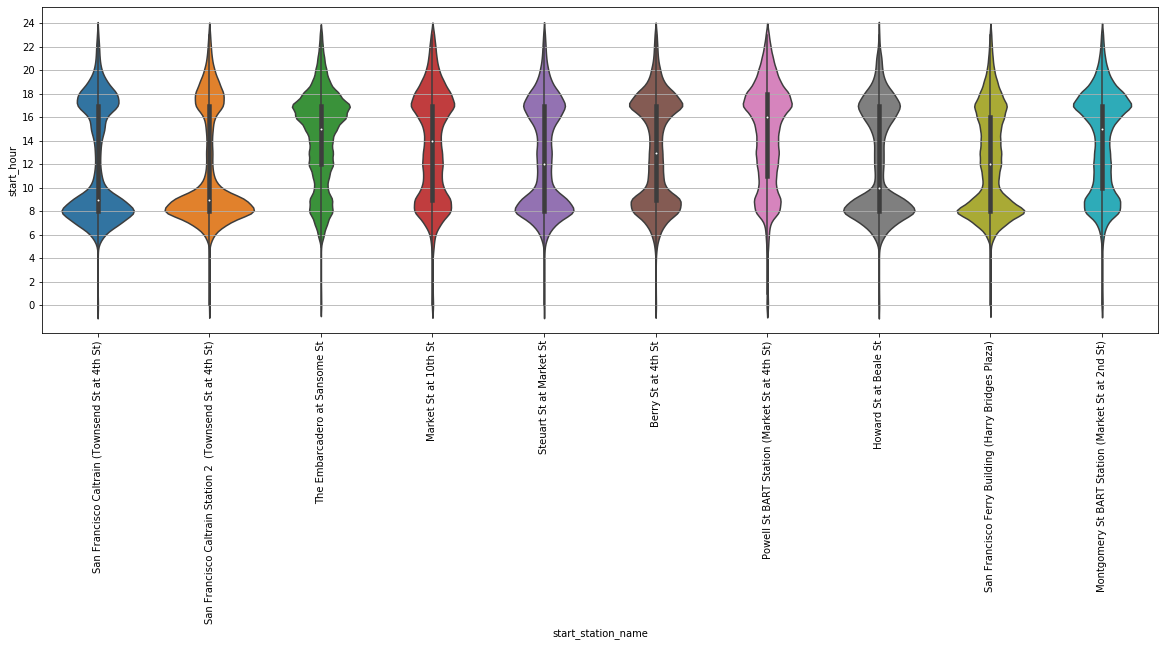

In [192]:
popular_start_stations = df_clean.start_station_name.value_counts().iloc[:10].sort_values().index
#print(popular_start_stations)
subset_df = df_clean[df_clean.start_station_name.isin(popular_start_stations)]
plt.subplots(figsize=(20,6))
sb.violinplot(data=subset_df, x='start_station_name', y='start_hour')
plt.xticks(rotation=90);
plt.yticks(np.arange(0,25,2));
plt.grid(axis='y')


<b>Insight No 15:</b> Start stations <i>"San Francisco Caltrain (Townsend St at 4th St)", "San Francisco Caltrain Station 2  (Townsend St at 4th St)","Steuart St at Market St", "Berry St at 4th St","Howard St at Beale St" and "San Francisco Ferry Building (Harry Bridges Plaza)" </i> seem to serve more users in the morning 8 AM as compared to other start stations. We can infer, most of the users using bikes for commuting to office purpose must be living somewhere near these start stations.

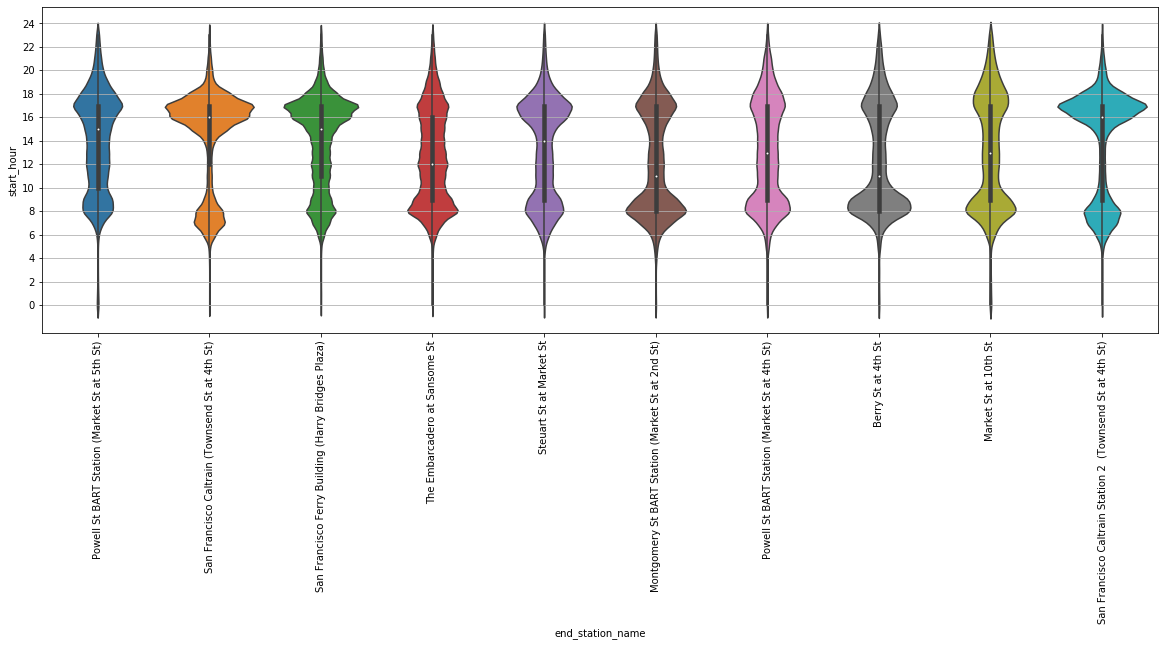

In [193]:
popular_end_stations = df_clean.end_station_name.value_counts().iloc[:10].sort_values().index
#print(popular_end_stations)
subset_df = df_clean[df_clean.end_station_name.isin(popular_end_stations)]
plt.subplots(figsize=(20,6))
sb.violinplot(data=subset_df, x='end_station_name', y='start_hour')
plt.xticks(rotation=90);
plt.yticks(np.arange(0,25,2));
plt.grid(axis='y')

<b>Insight No 16:</b> Similiary we can infer most people using bikes have offices located near to the following end stations.<br/>
San Francisco Caltrain (Townsend St at 4th St) <br/>
San Francisco Ferry Building (Harry Bridges Plaza)<br/>
San Francisco Caltrain Station 2  (Townsend St at 4th St) <br/>


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Bivariate analysis has discovered facts about the usage patters of subscribers and customers.
- First of all, There are more subscribers than customers.
- Most of the subscribers use bike for commuting to office purpose, and their usage drops significantly on weekends. On the other hand, Usage of customers is pretty equal on weekdays (Mon to Fri) but there is a slight increase in the volume of customers during weekends.
- Most of the customers use bike from around 11 AM to 6 PM.
- Most of the subscribers tend to ride bikes for shorter duration around 6 to 12 minutes While there is a much greater variations in rides of customer. We can also see, For longer trip durations (above 30 minutes), Customers ride more than the subscribers.
- Start stations <i>"The Embarcadero at Sansome St" and "San Francisco Ferry Building (Harry Bridges Plaza)" </i> serve comparatively more customers than other start stations.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>During analysis I've observed, following are the most used stations (both as start and end):<br/>
San Francisco Caltrain (Townsend St at 4th St) <br/>
San Francisco Ferry Building (Harry Bridges Plaza)<br/>
San Francisco Caltrain Station 2  (Townsend St at 4th St) <br/>

## Multivariate Exploration


In [194]:
subset_df = df_clean[(df_clean.duration_min >= 2) & (df_clean.duration_min <= 50)]

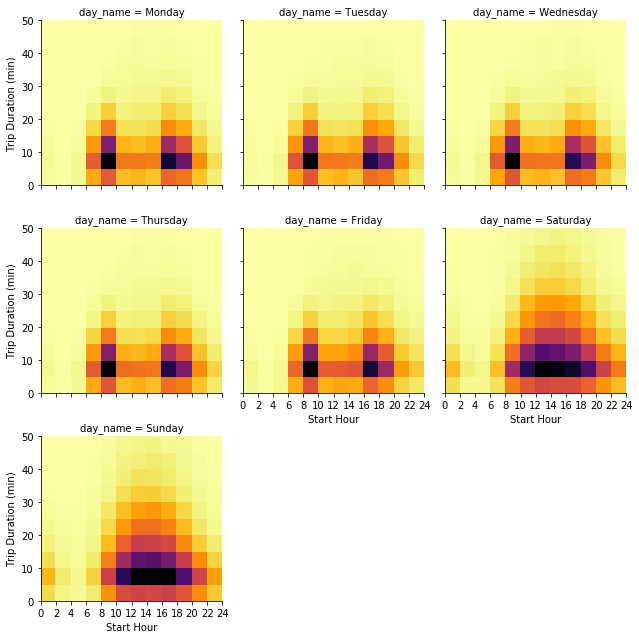

In [195]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color');
    bins_x = np.arange(0, subset_df['start_hour'].max()+2, 2);
    bins_y = np.arange(0, subset_df['duration_min'].max()+5, 5);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.xticks(np.arange(0, subset_df['start_hour'].max()+2, 2))

g = sb.FacetGrid(data = subset_df, col = 'day_name', col_wrap = 3, height = 3);
g.map(hist2dgrid, 'start_hour', 'duration_min', color = 'inferno_r');
g.set_xlabels('Start Hour');
g.set_ylabels('Trip Duration (min)');    

<b>Insight No 17:</b> Heatmaps from Monday to Friday clearly show almost same bike usage patterns, Most of the users using bikes at around 8 AM and 5 PM for under 10 minutes. On the other hand, there is a difference in usage patterns for weekends.  On weekends, most of the users use bikes starting from 10 AM till 8 PM. Moveover, we can see weekends also have longer durations of bike trips as compared to weekdays.

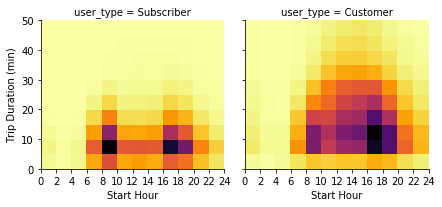

In [196]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color');
    bins_x = np.arange(0, subset_df['start_hour'].max()+2, 2);
    bins_y = np.arange(0, subset_df['duration_min'].max()+5, 5);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.xticks(np.arange(0, subset_df['start_hour'].max()+2, 2))

g = sb.FacetGrid(data = subset_df, col = 'user_type', col_wrap = 3, height = 3);
g.map(hist2dgrid, 'start_hour', 'duration_min', color = 'inferno_r');
g.set_xlabels('Start Hour');
g.set_ylabels('Trip Duration (min)');  

<b>Insight No 18:</b> Heatmap for subscribers shows usage at around 8-10 AM and 4-6 PM with short trip durations while heatmap for the customers depict most usage at around 4-6 PM. Furthermore, we can also see subscribers take short trips while customers take short as well as long trips.

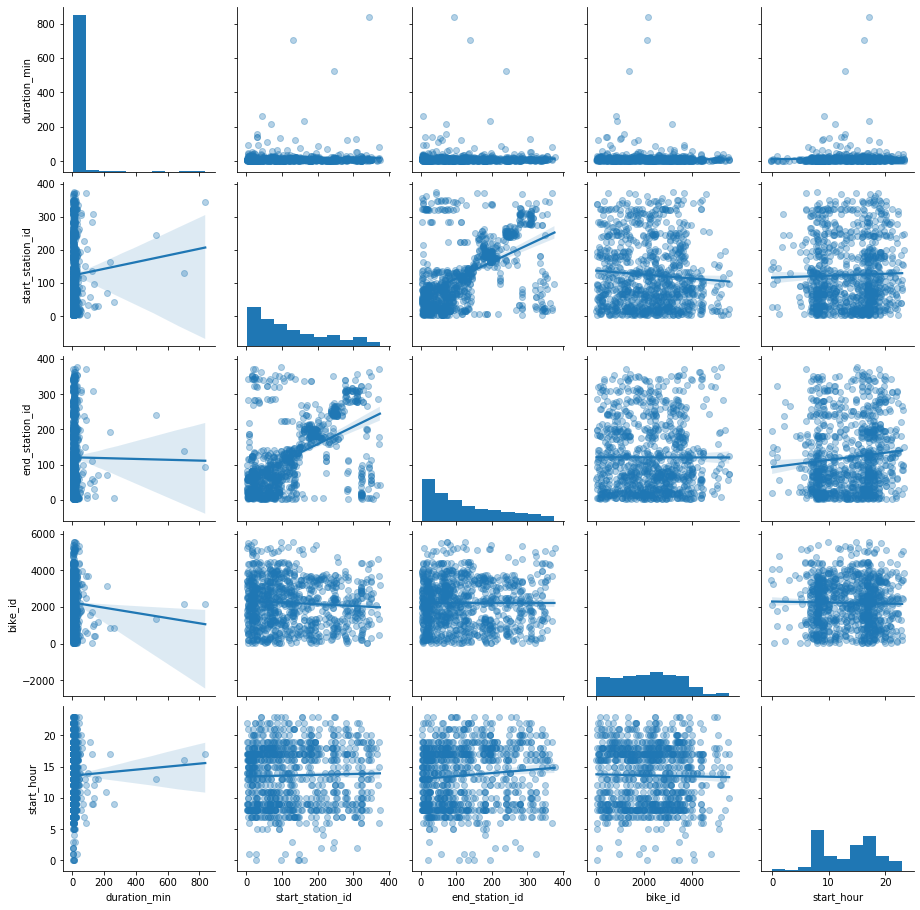

In [197]:
g = sb.PairGrid(data = df_clean.sample(1000), vars = ['duration_min', 'start_station_id','end_station_id', 'bike_id','start_hour'])
g.map_diag(plt.hist)
g.map_offdiag(sb.regplot,x_jitter=0.3,scatter_kws = {'alpha' : 1/3});

Out of the above plotted scatter plots, there can be a relationship between start station id and end station id. Let's check it numerically by plotting correlation heatmap.

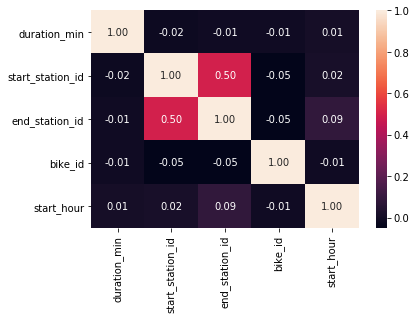

In [198]:
sb.heatmap(df_clean[['duration_min', 'start_station_id','end_station_id', 'bike_id','start_hour']].corr(),annot=True,
          fmt = '.2f');

<b>Insight No 19:</b> Interestingly, correlation heatmap shows high correlation value between start station id and end station id.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Overall we can say, YES, our analyses regarding the bike sharing system strengthened after performing multivariate analyses.<br/>
This section enhanced our investigations more and reached ultimately to the same conclusion.<br/>
We have concluded following points regarding the FordGo bike sharing system:<br/>
Most of the users are subscriber and they mainly use this service for commuting to office purpose due to which we can see through above heatmaps there were almost same bike usage patterns from Monday to Friday particularly at around 8 AM and 5 PM. 
Subsribers tend to take short trips rather than taking long trips.
Customers take more trips during weekends and they use to take long trips as compared to the subscribers.


### Were there any interesting or surprising interactions between features?

> While investigation relationship between different variables, we have seen there is a high correlation value between start station id and end station id. So we might use this value to predict end stations.